In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

%matplotlib inline

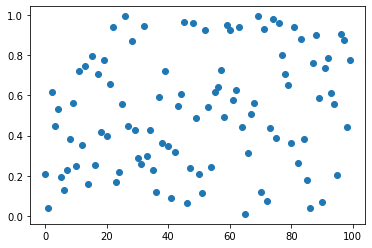

In [2]:
y = np.random.random(100)
x = np.arange(len(y))

plt.scatter(x,y)
plt.show()

In [3]:
y

array([0.21108278, 0.03944384, 0.6146204 , 0.44728306, 0.53058627,
       0.19487264, 0.12907005, 0.22939735, 0.38487416, 0.5594242 ,
       0.24722997, 0.72161254, 0.35486192, 0.74350996, 0.15940907,
       0.79570033, 0.25564977, 0.70676512, 0.41790453, 0.77626636,
       0.39550418, 0.65649071, 0.9393072 , 0.17063162, 0.22113649,
       0.55562686, 0.99270093, 0.44963051, 0.87172511, 0.42731672,
       0.28801644, 0.25751197, 0.94705472, 0.29896785, 0.42894183,
       0.22735141, 0.11922826, 0.59107898, 0.36434145, 0.72246463,
       0.34675781, 0.09084825, 0.32000189, 0.54761594, 0.60717743,
       0.96242542, 0.06361734, 0.23909955, 0.95785073, 0.4894874 ,
       0.20892684, 0.11659836, 0.92596157, 0.54042466, 0.24460514,
       0.61639827, 0.63959972, 0.72824003, 0.49055692, 0.9486514 ,
       0.92716718, 0.5790342 , 0.62552946, 0.93960962, 0.44210249,
       0.0103399 , 0.31468301, 0.50803871, 0.56109627, 0.99318319,
       0.121308  , 0.93043044, 0.07546442, 0.43824577, 0.98163

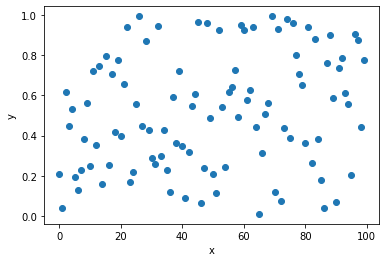

In [4]:
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
y[14] = 9
y[83] = 10
y[44] = 14

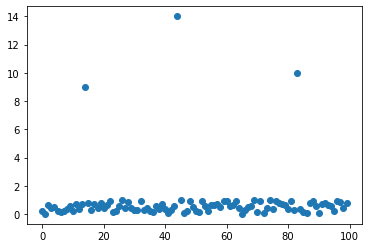

In [6]:
plt.scatter(x,y)
plt.show()

In [7]:
def test_stat(y, iteration):
    std_dev = np.std(y)
    avg_y = np.mean(y)
    abs_val_minus_avg = abs(y - avg_y)
    max_of_deviations = max(abs_val_minus_avg)
    max_ind = np.argmax(abs_val_minus_avg)
    cal = max_of_deviations/ std_dev
    print('Test {}'.format(iteration))
    print("Test Statistics Value(R{}) : {}".format(iteration,cal))
    return cal, max_ind

In [8]:
def calculate_critical_value(size, alpha, iteration):
    t_dist = stats.t.ppf(1 - alpha / (2 * size), size - 2)
    numerator = (size - 1) * np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size) * np.sqrt(size - 2 + np.square(t_dist))
    critical_value = numerator / denominator
    print("Critical Value(λ{}): {}".format(iteration, critical_value))
    return critical_value

In [9]:
def check_values(R, C, inp, max_index, iteration):
    if R > C:
        print('{} is an outlier. R{} > λ{}: {:.4f} > {:.4f} \n'.format(inp[max_index],iteration, iteration, R, C))
    else:
        print('{} is not an outlier. R{}> λ{}: {:.4f} > {:.4f} \n'.format(inp[max_index],iteration, iteration, R, C))


In [139]:
def ESD_Test(input_series, alpha, max_outliers):
    stats = []
    critical_vals = []
    for iterations in range(1, max_outliers + 1):
        stat, max_index = test_stat(input_series, iterations)
        critical = calculate_critical_value(len(input_series), alpha, iterations)
        check_values(stat, critical, input_series, max_index, iterations)
        input_series = np.delete(input_series, max_index)
        critical_vals.append(critical)
        stats.append(stat)
        if stat > critical:
            max_i = iterations
    print('H0:  there are no outliers in the data')
    print('Ha:  there are up to 10 outliers in the data')
    print('')
    print('Significance level:  α = {}'.format(alpha))
    print('Critical region:  Reject H0 if Ri > critical value')
    print('Ri: Test statistic')
    print('λi: Critical Value')
    print(' ')
    df = pd.DataFrame({'i' :range(1, max_outliers + 1), 'Ri': stats, 'λi': critical_vals})
    
    def highlight_max(x):
        if x.i == max_i:
            return ['background-color: yellow']*3
        else:
            return ['background-color: white']*3
    df.index = df.index + 1
    print('Number of outliers {}'.format(max_i))
    
    return  df.style.apply(highlight_max, axis = 1)

In [140]:
ESD_Test(y, 0.05, 7)

Test 1
Test Statistics Value(R1) : 7.124123864567765
Critical Value(λ1): 3.384082902288351
14.0 is an outlier. R1 > λ1: 7.1241 > 3.3841 

Test 2
Test Statistics Value(R2) : 7.172286053117003
Critical Value(λ2): 3.380650508067058
10.0 is an outlier. R2 > λ2: 7.1723 > 3.3807 

Test 3
Test Statistics Value(R3) : 9.345694139119193
Critical Value(λ3): 3.377175980782947
9.0 is an outlier. R3 > λ3: 9.3457 > 3.3772 

Test 4
Test Statistics Value(R4) : 1.7759216587377087
Critical Value(λ4): 3.3736583400522497
0.010339898586288032 is not an outlier. R4> λ4: 1.7759 > 3.3737 

Test 5
Test Statistics Value(R5) : 1.7119004583891522
Critical Value(λ5): 3.370096570986626
0.03944383654485473 is not an outlier. R5> λ5: 1.7119 > 3.3701 

Test 6
Test Statistics Value(R6) : 1.744244223307002
Critical Value(λ6): 3.3664896240676505
0.04050776277425905 is not an outlier. R6> λ6: 1.7442 > 3.3665 

Test 7
Test Statistics Value(R7) : 1.6987570708520543
Critical Value(λ7): 3.362836413028039
0.06361733886985133 is

,i,Ri,λi
1,1,7.124124,3.384083
2,2,7.172286,3.380651
3,3,9.345694,3.377176
4,4,1.775922,3.373658
5,5,1.711900,3.370097
6,6,1.744244,3.366490
7,7,1.698757,3.362836
